# Exploratory Data Analysis (EDA):

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments\PCA\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

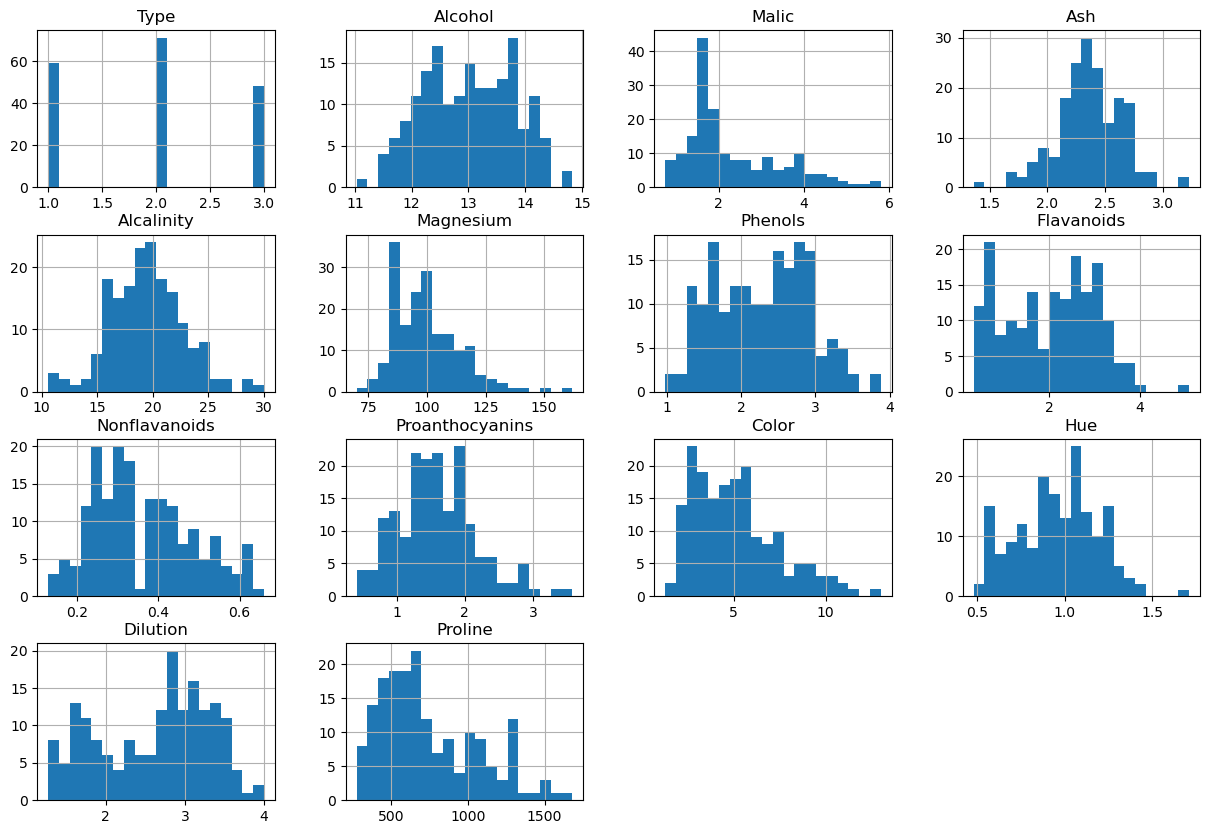

In [8]:
df.hist(bins=20, figsize=(15,10))
plt.show()

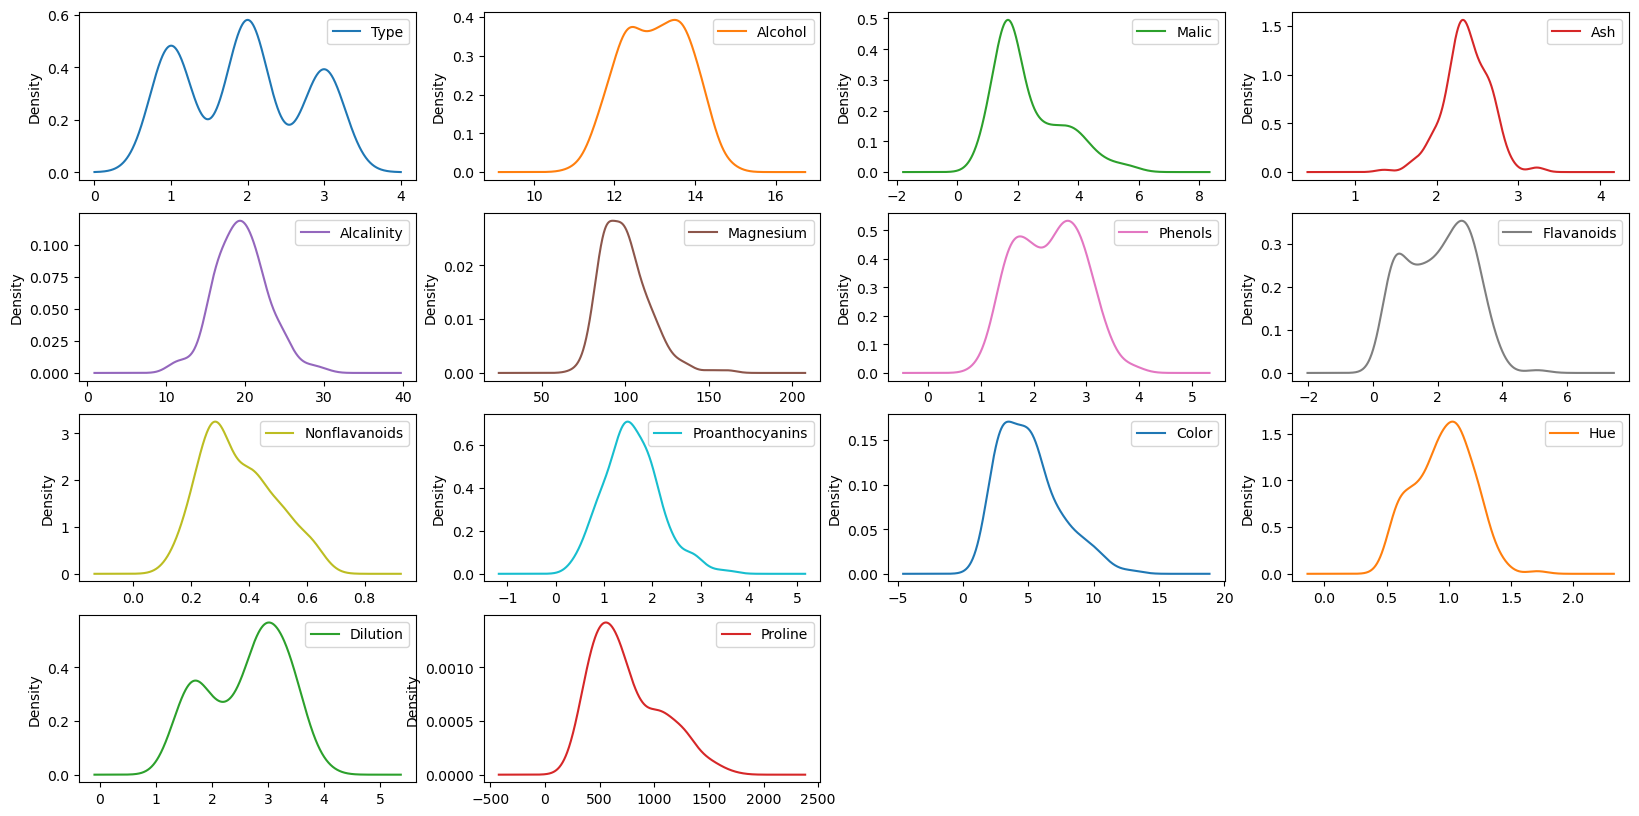

In [9]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False, figsize=(20,10))
plt.show()

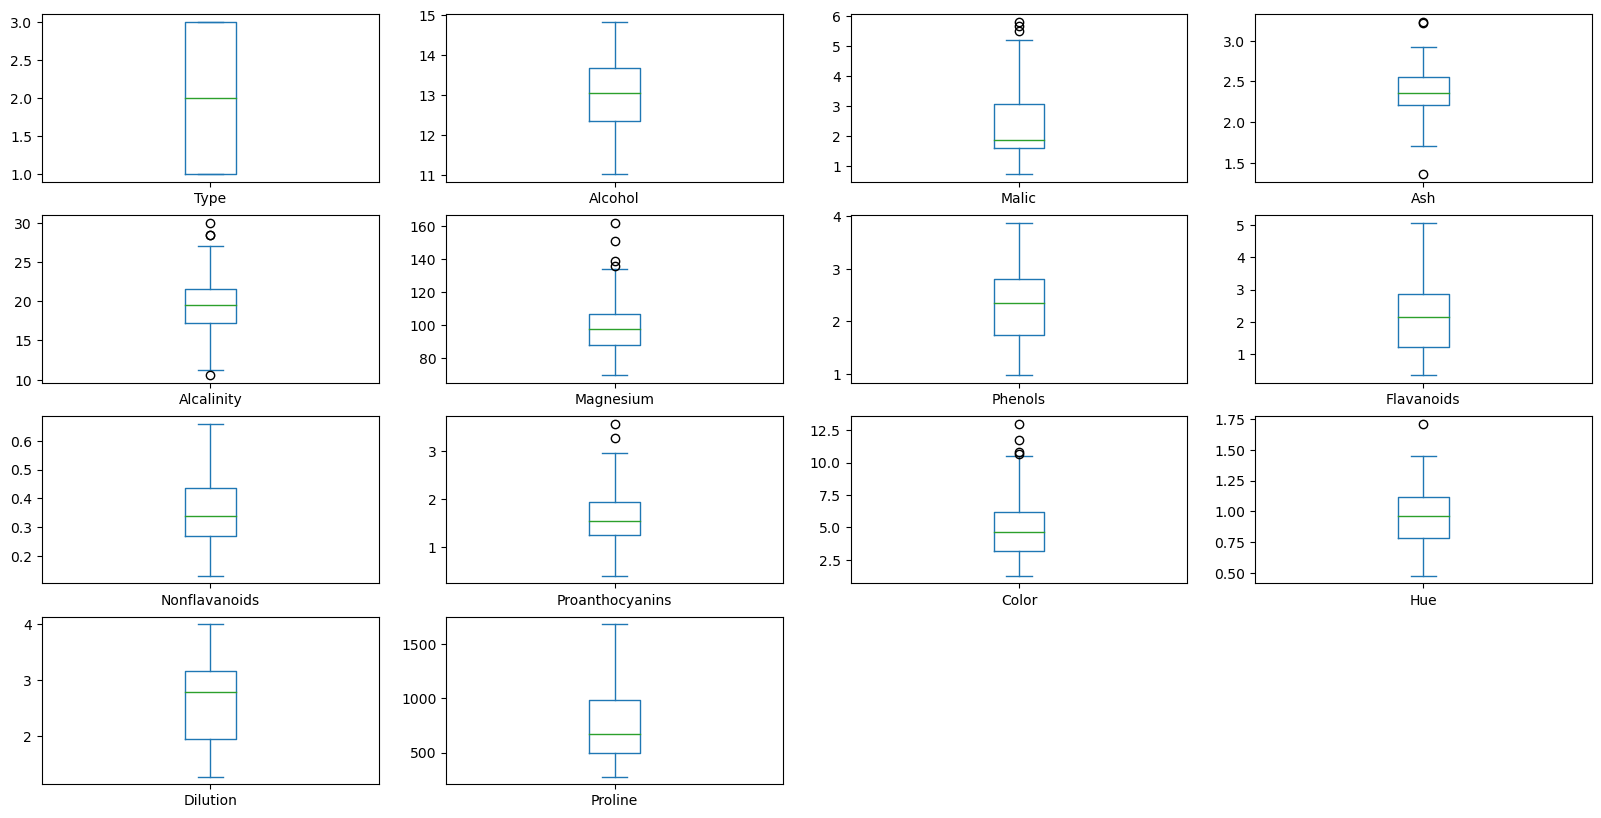

In [10]:
#Boxplot to check outliers and see the distribution of the data
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,10))
plt.show()

In [11]:
# Removing outliers

# 1) Malic

upper_limit = df['Malic'].mean() + 3*df['Malic'].std()
lower_limit = df['Malic'].mean() - 3*df['Malic'].std()

print(upper_limit,lower_limit)


5.68778660745013 -1.0150899782366465


In [12]:
df.loc[(df['Malic']>upper_limit)|(df['Malic']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
123,2,13.05,5.8,2.13,21.5,86,2.62,2.65,0.3,2.01,2.6,0.73,3.1,380


In [13]:
df.loc[(df['Malic']>upper_limit), 'Malic'] = upper_limit
df.loc[(df['Malic']<lower_limit), 'Malic'] = lower_limit

<Axes: >

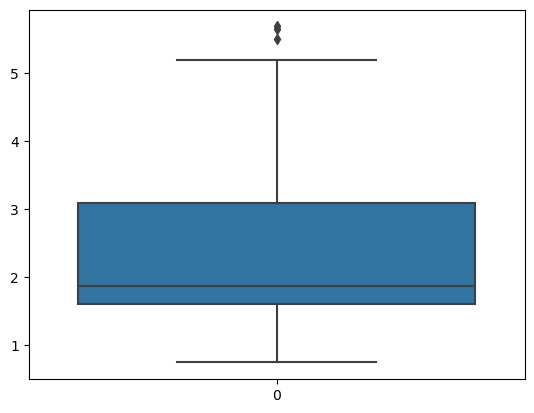

In [14]:
sns.boxplot(df['Malic'])

In [15]:
# 2) Ash  

upper_limit = df['Ash'].mean() + 3*df['Ash'].std()
lower_limit = df['Ash'].mean() - 3*df['Ash'].std()

print(upper_limit,lower_limit)


3.1895488811150288 1.5434848267501402


In [16]:
df.loc[(df['Ash']>upper_limit)|(df['Ash']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [17]:
df.loc[(df['Ash']>upper_limit), 'Ash'] = upper_limit
df.loc[(df['Ash']<lower_limit), 'Ash'] = lower_limit

<Axes: >

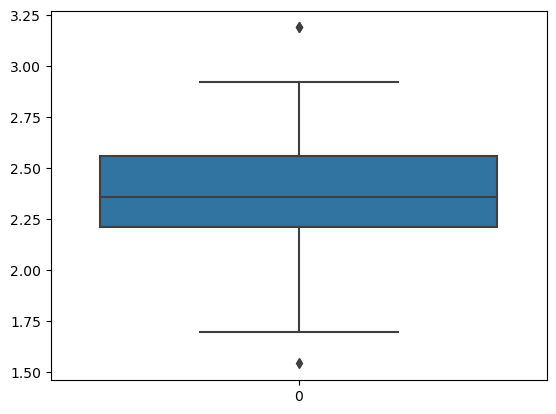

In [18]:
sns.boxplot(df['Ash'])

In [19]:
# 3) Alcalinity 

upper_limit = df['Alcalinity'].mean() + 3*df['Alcalinity'].std()
lower_limit = df['Alcalinity'].mean() - 3*df['Alcalinity'].std()

print(upper_limit,lower_limit)


29.513635121745235 9.476252518704204


In [20]:
df.loc[(df['Alcalinity']>upper_limit)|(df['Alcalinity']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
73,2,12.99,1.67,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985


In [21]:
df.loc[(df['Alcalinity']>upper_limit), 'Alcalinity'] = upper_limit
df.loc[(df['Alcalinity']<lower_limit), 'Alcalinity'] = lower_limit

<Axes: >

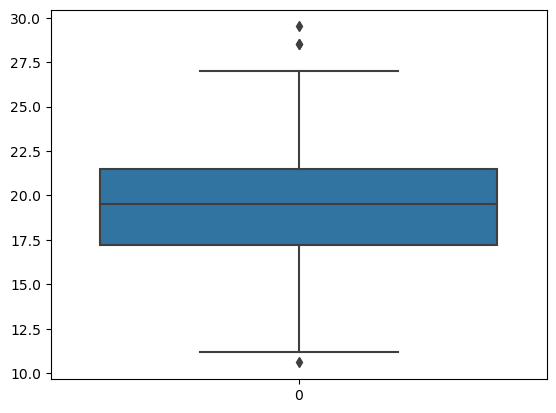

In [22]:
sns.boxplot(df['Alcalinity'])

In [23]:
# 4) Magnesium

upper_limit = df['Magnesium'].mean() + 3*df['Magnesium'].std()
lower_limit = df['Magnesium'].mean() - 3*df['Magnesium'].std()

print(upper_limit,lower_limit)

142.58902357959488 56.89412248782086


In [24]:
df.loc[(df['Magnesium']>upper_limit)|(df['Magnesium']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [25]:
df.loc[(df['Magnesium']>upper_limit), 'Magnesium'] = upper_limit
df.loc[(df['Magnesium']<lower_limit), 'Magnesium'] = lower_limit

<Axes: >

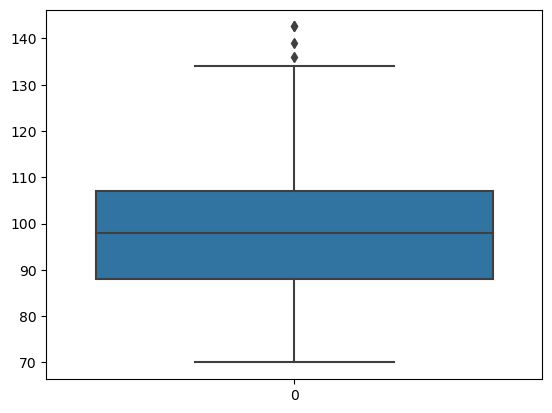

In [26]:
sns.boxplot(df['Magnesium'])

In [27]:
# 5) Proanthocyanins  

upper_limit = df['Proanthocyanins'].mean() + 3*df['Proanthocyanins'].std()
lower_limit = df['Proanthocyanins'].mean() - 3*df['Proanthocyanins'].std()

print(upper_limit,lower_limit)

3.307975464428778 -0.12617771161978886


In [28]:
df.loc[(df['Proanthocyanins']>upper_limit)|(df['Proanthocyanins']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
110,2,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [29]:
df.loc[(df['Proanthocyanins']>upper_limit), 'Proanthocyanins'] = upper_limit
df.loc[(df['Proanthocyanins']<lower_limit), 'Proanthocyanins'] = lower_limit

<Axes: >

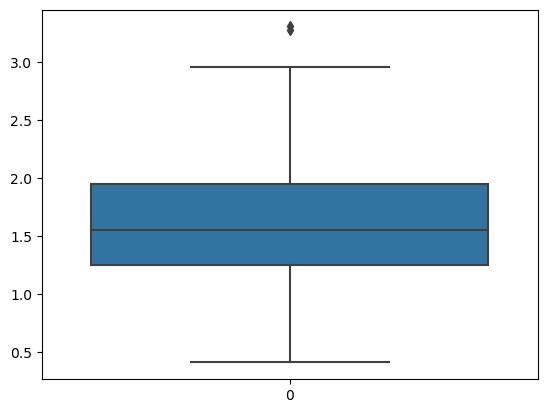

In [30]:
sns.boxplot(df['Proanthocyanins'])

In [31]:
# 6) Color

upper_limit = df['Color'].mean() + 3*df['Color'].std()
lower_limit = df['Color'].mean() - 3*df['Color'].std()

print(upper_limit,lower_limit)

12.01294749748971 -1.8967677334447668


In [32]:
df.loc[(df['Color']>upper_limit)|(df['Color']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
158,3,14.34,1.68,2.7,25.0,98.0,2.8,1.31,0.53,2.7,13.0,0.57,1.96,660


In [33]:
df.loc[(df['Color']>upper_limit), 'Color'] = upper_limit
df.loc[(df['Color']<lower_limit), 'Color'] = lower_limit

<Axes: >

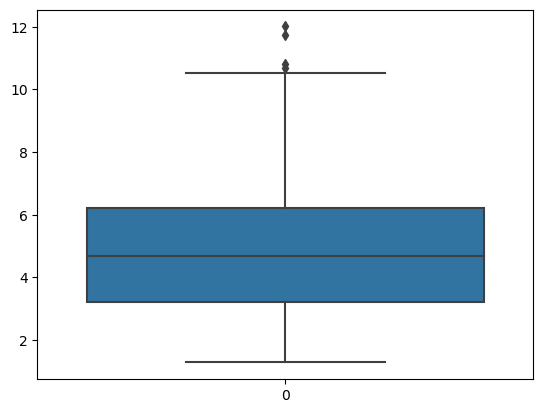

In [34]:
sns.boxplot(df['Color'])

In [35]:
# 7) Hue

upper_limit = df['Hue'].mean() + 3*df['Hue'].std()
lower_limit = df['Hue'].mean() - 3*df['Hue'].std()

print(upper_limit,lower_limit)

1.6431641356917173 0.27173474071277703


In [36]:
df.loc[(df['Hue']>upper_limit)|(df['Hue']<lower_limit)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
115,2,11.03,1.51,2.2,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [37]:
df.loc[(df['Hue']>upper_limit), 'Hue'] = upper_limit
df.loc[(df['Hue']<lower_limit), 'Hue'] = lower_limit

<Axes: >

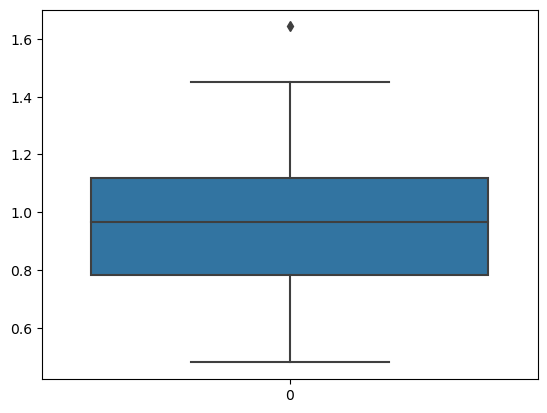

In [38]:
sns.boxplot(df['Hue'])

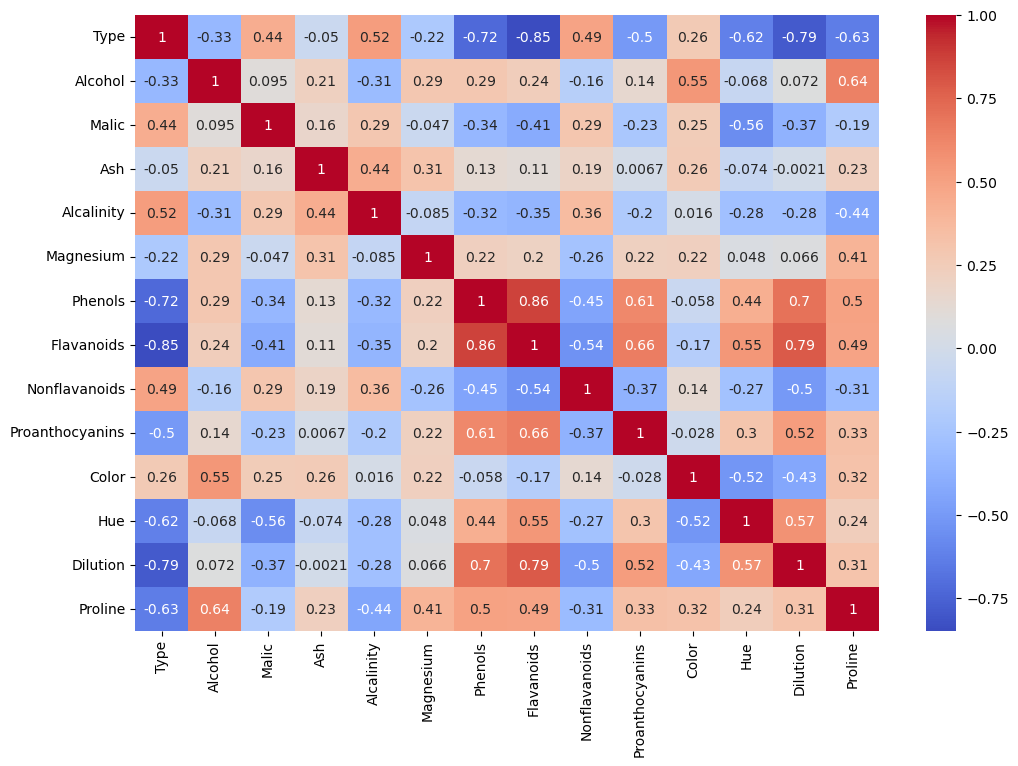

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Dimensionality Reduction with PCA:

In [40]:
# Standardize the features

features = df.columns[1:]  
# Exclude 'Type' as it's likely the label
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [43]:
# PCA Implementation

pca = PCA()
principalComponents = pca.fit_transform(x)

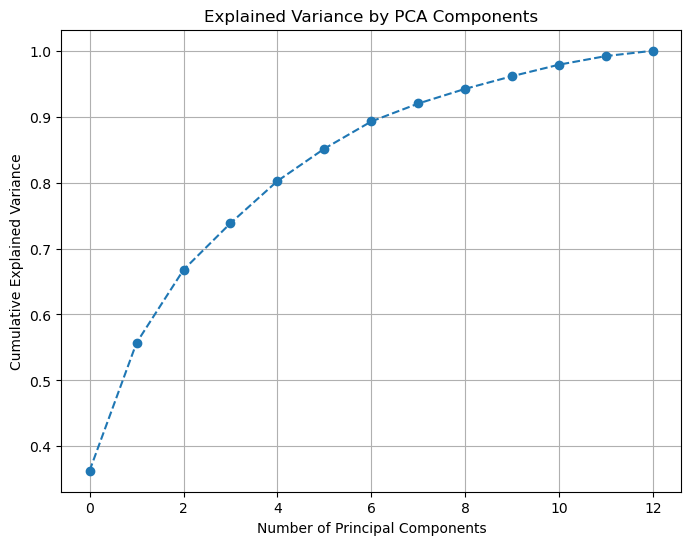

In [44]:
# Scree plot and cumulative explained variance

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [45]:
# Determine the number of components to keep (e.g., 95% variance explained)
pca_opt = PCA(n_components=0.95)  # Keep enough components to explain 95% variance
pca_data = pca_opt.fit_transform(x)
print(f'Number of components selected: {pca_opt.n_components_}')

Number of components selected: 10


# Clustering with Original Data:

In [46]:
# Clustering with Original Data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [47]:
# Apply K-means clustering to the original dataset (excluding 'Type')
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters (for wine types)
kmeans_original.fit(x)

C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

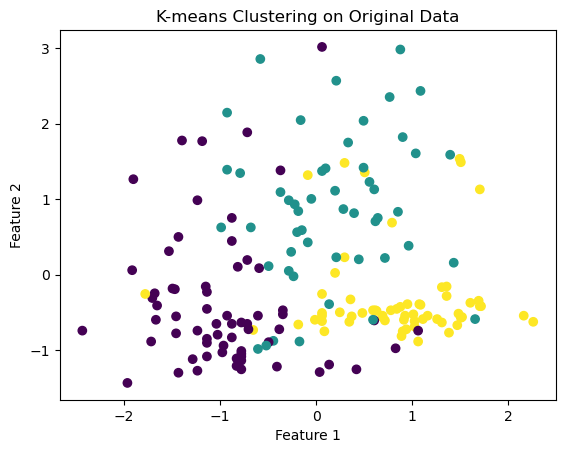

In [48]:
# Visualize Clustering Results (Use the first two features for visualization)
plt.scatter(x[:, 0], x[:, 1], c=kmeans_original.labels_, cmap='viridis')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [49]:
# Evaluate Clustering Performance using Silhouette Score
silhouette_original = silhouette_score(x, kmeans_original.labels_)
print(f'Silhouette Score for Original Data: {silhouette_original}')

Silhouette Score for Original Data: 0.28489927124818776


# Clustering with PCA-Transformed Data

In [51]:
#  Apply K-means clustering to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)


C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

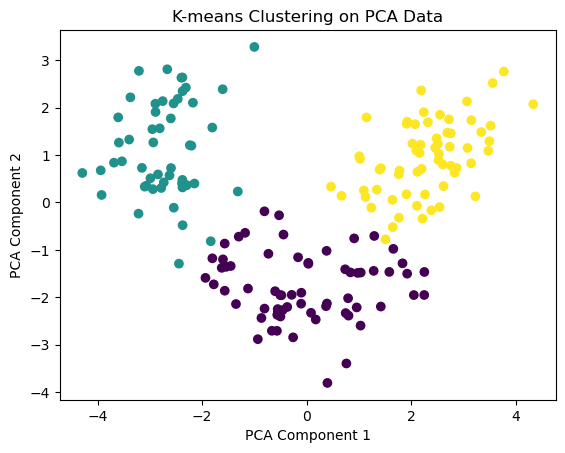

In [53]:
# Visualize Clustering Results on PCA-Transformed Data
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-means Clustering on PCA Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [54]:
# Evaluate Clustering Performance using Silhouette Score
silhouette_pca = silhouette_score(pca_data, kmeans_pca.labels_)
print(f'Silhouette Score for PCA Data: {silhouette_pca}')

Silhouette Score for PCA Data: 0.29866810354367596


In [56]:
# Comparison and Analysis

In [55]:
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')


Silhouette Score (Original Data): 0.28489927124818776
Silhouette Score (PCA Data): 0.29866810354367596
